In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.DataFrame(pd.read_csv('uber.csv'),columns=[
    "fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"
])

In [3]:
df=df[df.pickup_longitude!=0]
df.dropna(inplace=True)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

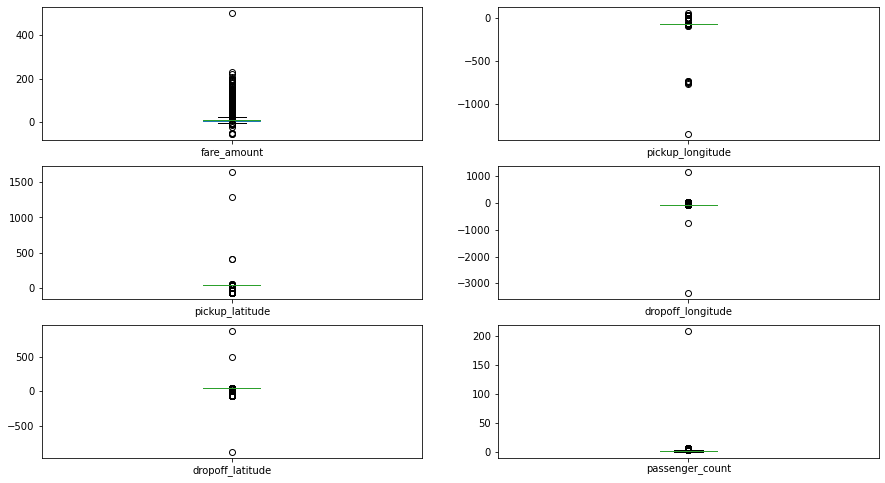

In [4]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [5]:
def remove_outlier(df , col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[col] = np.clip(df[col] , lower_bound , upper_bound)
    return df

In [6]:
def treat_outliers_all(df):
    for c in df.columns:
        df = remove_outlier(df , c)
    return df

In [7]:
df = treat_outliers_all(df)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.00,-73.932372,40.744085,-73.973082,40.761247,3.5
...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,22.25,-73.986017,40.756487,-73.925677,40.692588,2.0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

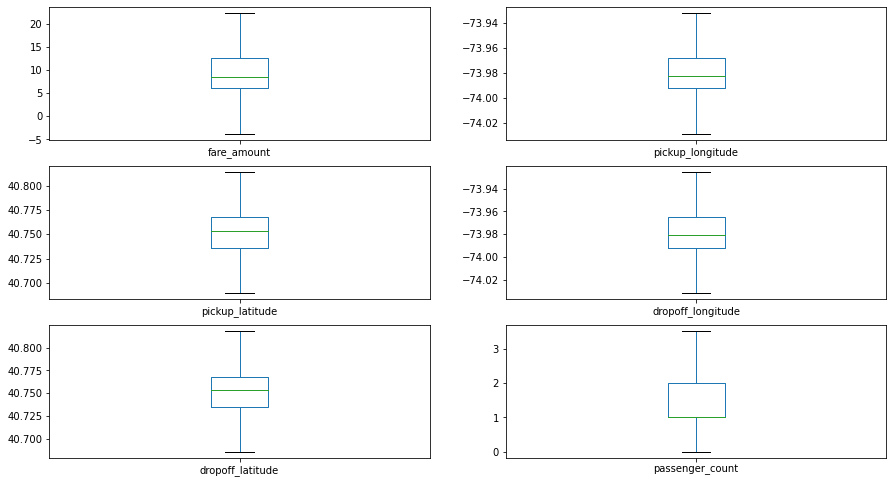

In [8]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [43]:
travel_dist = []
for i in range(len(df['pickup_longitude'])):
    x1,y1,x2,y2 = [
        df.iloc[i]['pickup_longitude'],
        df.iloc[i]['pickup_latitude'],
        df.iloc[i]['dropoff_longitude'],
        df.iloc[i]['dropoff_latitude']
    ]
    a=(x1,y1)
    b=(x2,y2)
    c = hs.haversine(a,b)
    travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,0.465182
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,0.678729
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,4.823528
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,1.261640
4,16.00,-73.932372,40.744085,-73.973082,40.761247,3.5,4.557440
...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,0.064177
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2.442223
199997,22.25,-73.986017,40.756487,-73.925677,40.692588,2.0,6.990979
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,1.800097


In [44]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
fare_amount,1.000000,0.156802,-0.115034,0.225312,-0.131270,0.016089,0.732969
pickup_longitude,0.156802,1.000000,0.440931,0.362958,0.203572,-0.013330,0.104120
pickup_latitude,-0.115034,0.440931,1.000000,0.185802,0.460544,-0.015061,-0.080890
dropoff_longitude,0.225312,0.362958,0.185802,1.000000,0.403438,-0.009438,0.271873
dropoff_latitude,-0.131270,0.203572,0.460544,0.403438,1.000000,-0.007779,-0.057649
passenger_count,0.016089,-0.013330,-0.015061,-0.009438,-0.007779,1.000000,0.005126
dist_travel_km,0.732969,0.104120,-0.080890,0.271873,-0.057649,0.005126,1.000000


<AxesSubplot:>

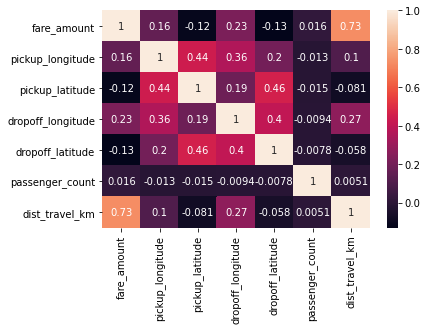

In [45]:
# plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

In [46]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','dist_travel_km']]
y = df['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [47]:
linearRegression=LinearRegression()
linearRegression.fit(x_train,y_train)
# linearRegression.coef_

LinearRegression()

In [48]:
# linearRegression.intercept_

In [49]:
# y = a1.x1 + a2.x2 + a3.x3 + a4.x4 + a5.x5 + a6.x6 + c
y_pred=linearRegression.predict(x_test)
y_pred

array([ 7.78178176,  6.21478634, 20.13654135, ..., 12.08058112,
        8.62853238, 14.3712213 ])

In [50]:
r2_score(y_test,y_pred)

0.5585887947052366

In [51]:
mean_squared_error(y_test,y_pred)

12.839234931908598

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
randomForest = RandomForestRegressor(n_estimators=100)
randomForest.fit(x_train,y_train)
y_pred = randomForest.predict(x_test)
y_pred

In [ ]:
r2_score(y_test,y_pred)

In [31]:
mean_squared_error(y_test,y_pred)

6.611202879355314

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.571225948716937

In [ ]:
# Conclusion: random forest regression better than linear regression